In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [6]:
#read image
image = cv2.imread('CT scanned sample - (b).png')

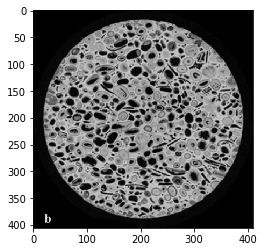

In [7]:
#convert image into grayscale (single channel)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [8]:
#used Bob detectors to detect pores. It identifies the dark connected pixels and groups and mark those regios.
#
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minInertiaRatio = 0.01
params.minThreshold = 40;
params.maxThreshold = 255;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 100
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = True
params.filterByInertia = 0.01

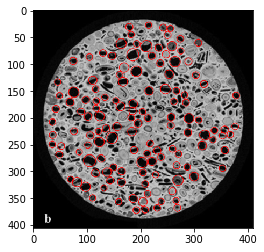

In [9]:
detector = cv2.SimpleBlobDetector_create(params)
 
# Detect blobs.
keypoints = detector.detect(gray)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(gray, keypoints,np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)